In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, r2_score

from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
df = pd.read_csv('./datasets/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

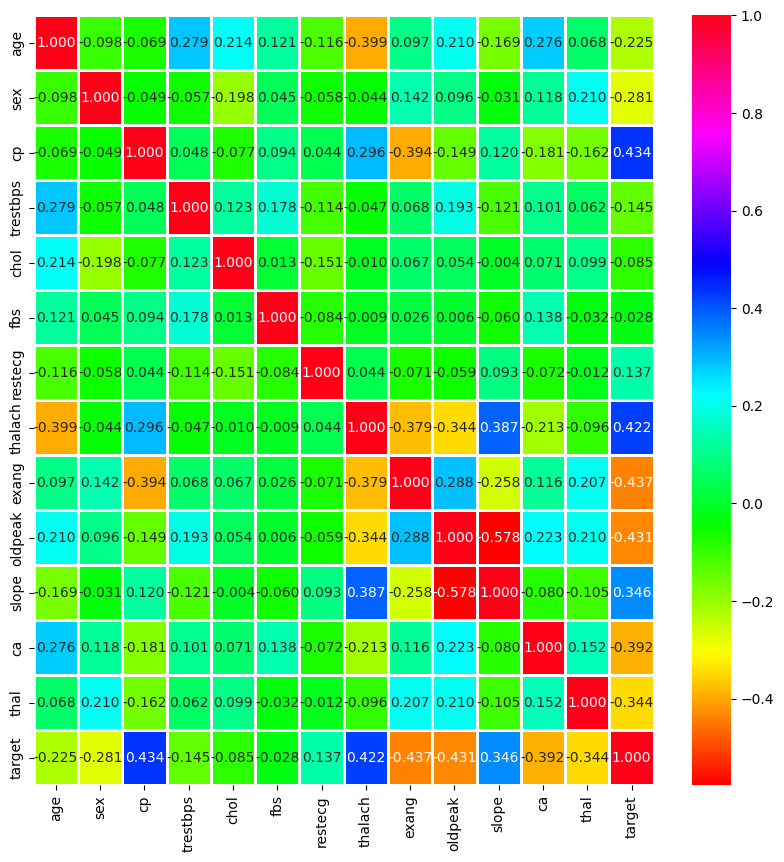

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='hsv', fmt='.3f', linewidths=2)

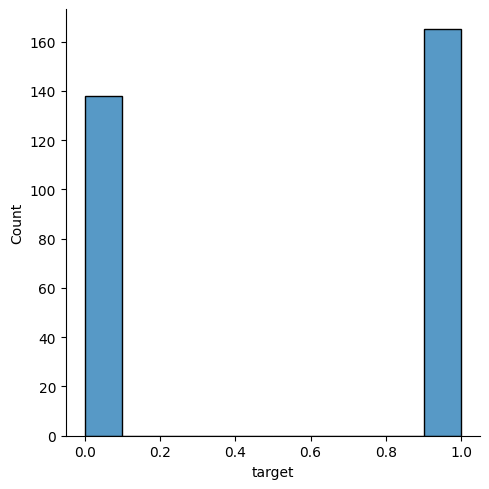

In [10]:
sns.displot(df['target'])

In [11]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [13]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

Text(0, 0.5, 'Chest pain')

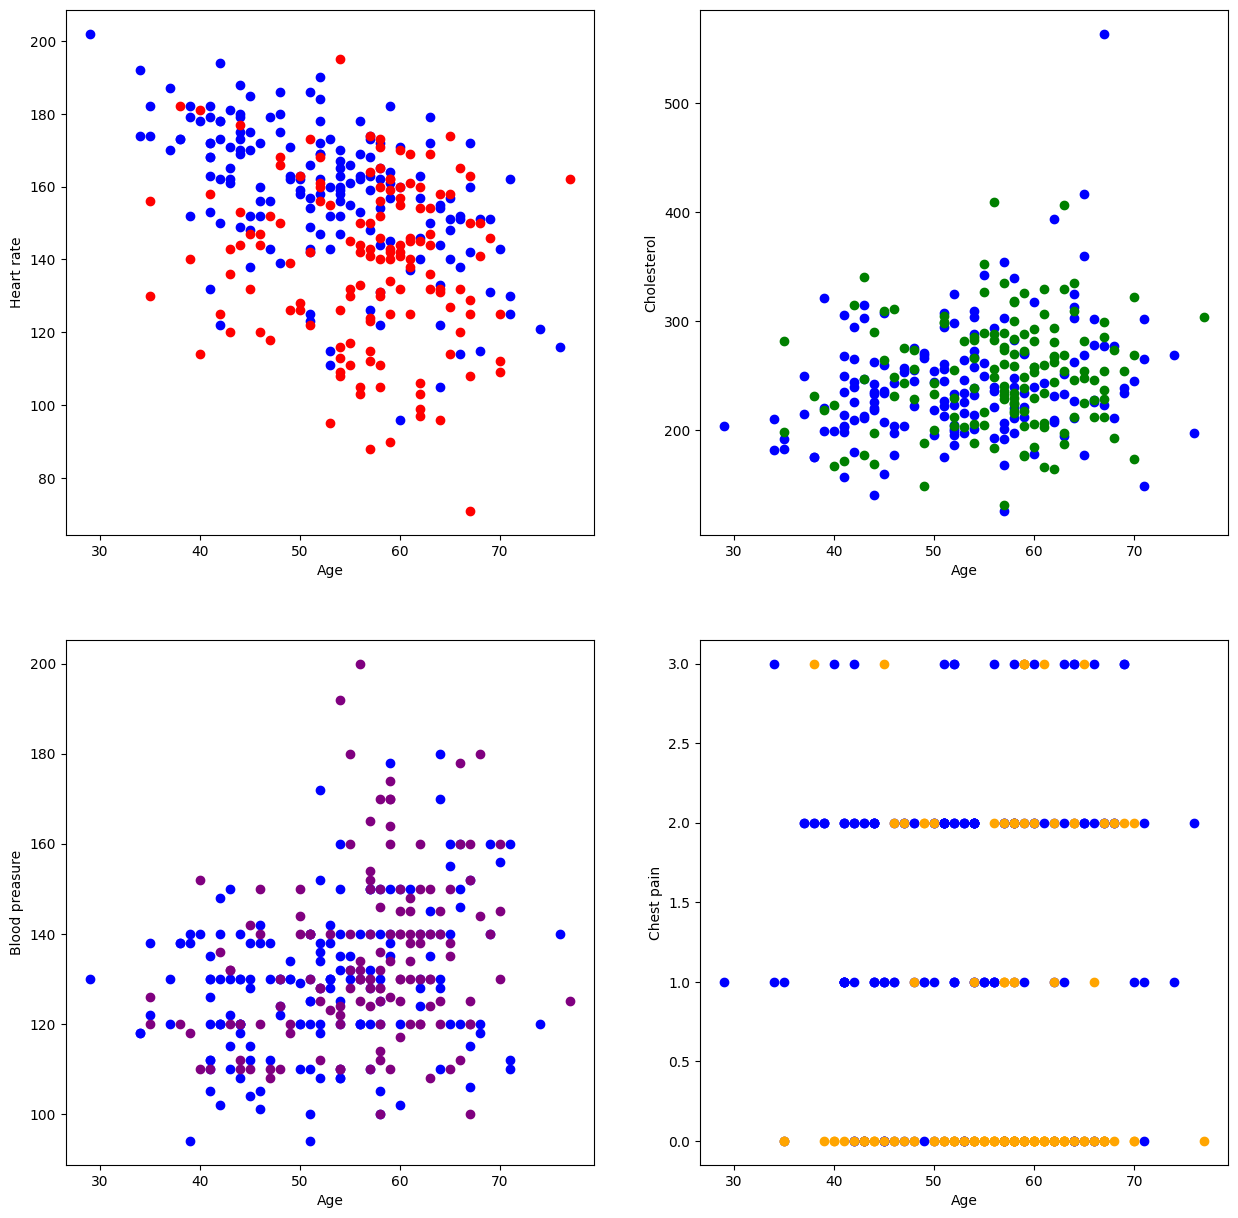

In [18]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.scatter(x=df.age[df.target==1], y=df.thalach[df.target==1], c='blue')
plt.scatter(x=df.age[df.target==0], y=df.thalach[df.target==0], c='red')
plt.xlabel('Age')
plt.ylabel('Heart rate')

plt.subplot(2, 2, 2)
plt.scatter(x=df.age[df.target==1], y=df.chol[df.target==1], c='blue')
plt.scatter(x=df.age[df.target==0], y=df.chol[df.target==0], c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

plt.subplot(2, 2, 3)
plt.scatter(x=df.age[df.target==1], y=df.trestbps[df.target==1], c='blue')
plt.scatter(x=df.age[df.target==0], y=df.trestbps[df.target==0], c='purple')
plt.xlabel('Age')
plt.ylabel('Blood preasure')

plt.subplot(2, 2, 4)
plt.scatter(x=df.age[df.target==1], y=df.cp[df.target==1], c='blue')
plt.scatter(x=df.age[df.target==0], y=df.cp[df.target==0], c='orange')
plt.xlabel('Age')
plt.ylabel('Chest pain')

In [21]:
features = df.drop(columns=['target'], axis=1)
target = df['target']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [25]:
scaler = StandardScaler()

In [26]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### NN - Keras model

In [44]:
model = Sequential()

In [45]:
len(x_train[0])

13

In [46]:
model.add(Dense(32, input_dim=(len(x_train[0])), kernel_initializer='uniform', activation='relu'))

c:\Users\Ace\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))

In [48]:
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4672 - loss: 0.6931
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5412 - loss: 0.6929 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5165 - loss: 0.6927 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5267 - loss: 0.6920 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5133 - loss: 0.6908 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5416 - loss: 0.6875 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6513 - loss: 0.6824 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7703 - loss: 0.6758 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8609 - loss: 0.6583  
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8557 - loss: 0.6375 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8711 - loss: 0.5971 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8493 - los

In [51]:
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [54]:
y_pred = y_pred.round()

In [56]:
f1_score(y_pred, y_test)

0.7941176470588235

In [58]:
confusion_matrix(y_pred, y_test)

array([[20,  9],
       [ 5, 27]], dtype=int64)

<Axes: >

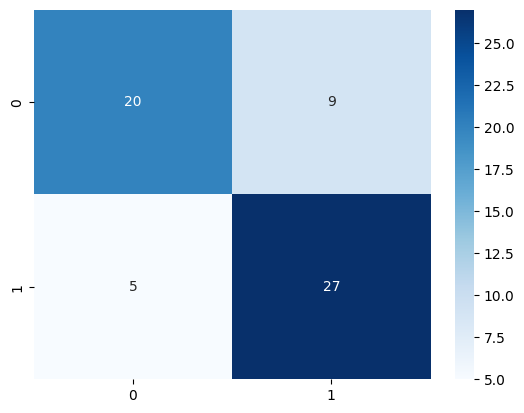

In [63]:
sns.heatmap(confusion_matrix(y_pred, y_test), cmap='Blues', annot=True)

In [66]:
df = pd.read_csv('./datasets/Admission_Predict.csv')

In [67]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [68]:
features = df.drop(columns=['Serial No.', 'Chance of Admit '])
target = df['Chance of Admit ']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [70]:
scaler = StandardScaler()

In [71]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [92]:
model = Sequential()

In [93]:
model.add(Dense(32, input_dim=len(x_train[0]), kernel_initializer='normal', activation='relu'))

c:\Users\Ace\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.add(Dropout(0.2, input_shape=(32,)))

c:\Users\Ace\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1, input_shape=(10, )))

In [96]:
model.add(Dense(1, activation='sigmoid'))

In [97]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 597 (2.33 KB)

 Trainable params: 597 (2.33 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
model.compile(loss='mse', optimizer='adam')

In [99]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0698 - val_loss: 0.0572
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0530 - val_loss: 0.0442
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0404 - val_loss: 0.0337
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0299 - val_loss: 0.0255
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0259 - val_loss: 0.0193
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0192 - val_loss: 0.0150
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0162 - val_loss: 0.0122
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0150 - val_loss: 0.0105
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0142 - val_loss: 0.0093
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0121 - val_loss: 0.0085
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0092 - val_loss: 0.0078
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0086 - val_loss: 0.0073
Epoch 13/30


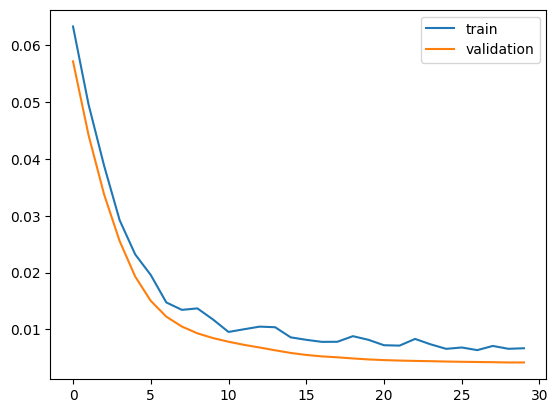

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])

In [101]:
y_pred = model.predict(x_test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F0156B1510> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


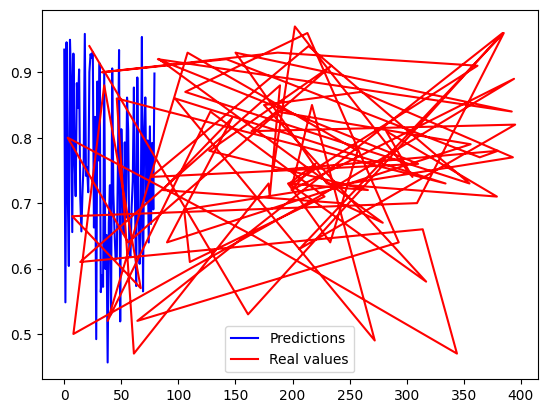

In [102]:
plt.plot(y_pred, color='blue')
plt.plot(y_test, color='red')
plt.legend(['Predictions', 'Real values'])

In [103]:
r2_score(y_pred, y_test)

0.7903956691551595

In [105]:
pd.DataFrame(y_test)

,Chance of Admit
22,0.94
161,0.53
384,0.96
64,0.52
293,0.64
...,...
147,0.83
86,0.72
242,0.70
279,0.67
